In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils as u
from itertools import combinations
from sklearn import manifold
from matplotlib import rc
rc('text', usetex=False)

In [3]:
rs = 777
np.random.seed(rs)
obj_bsfldr = 'obj/'

# train: randm and diff
# test: obama and fake
def get_dataset(dataset):

    X_test = None
    y_test = None
    i = 0
    all_keys = list(dataset.keys())
    all_keys = np.sort(all_keys)
    for k in all_keys:
        
        # pick only last 20 files
        sort_keys = np.sort(list(dataset[k].keys()))
        sort_keys = sort_keys[-30:].copy()
        #print(k, np.vstack(list(dataset[k].values())).shape)
        if type(list(remove_keys(dataset[k]).values())[0]).__module__ == np.__name__:
            f_arr = np.vstack([dataset[k][l] for l in sort_keys])
        else:
            f_arr = np.array(pd.concat([dataset[k][l] for l in sort_keys], ignore_index=True, sort=False))
            
        idx = np.random.choice(range(len(f_arr)), size=np.min([1000, len(f_arr)]), replace=False)
        if X_test is None:
            X_test = f_arr[idx, :].copy()
            y_test = np.zeros((len(X_test), ))
        else:
            X_test = np.concatenate((X_test, f_arr[idx, :]), axis=0)
            y_test = np.concatenate((y_test, np.zeros((len(f_arr[idx, :]), ))+i), axis=0)

        i = i+1
    return X_test, y_test

def remove_keys(cur_dict):
    cur_dict.pop('__header__', None)
    cur_dict.pop('__version__', None)
    cur_dict.pop('__globals__', None)
    return cur_dict

In [4]:
#this one combination result
def one_setting_train(dataset, dataset_func, title):

    #get datasets
    X_test, y_test = dataset_func(dataset)
    tsne = manifold.TSNE(n_components=2, perplexity=30.0,
                         early_exaggeration=12.0, learning_rate=200.0,
                         n_iter=1000, n_iter_without_progress=300,
                         min_grad_norm=1e-07, metric='euclidean',
                         init='random', verbose=0, random_state=rs,
                         method='barnes_hut', angle=0.5)
    print('tsne train {}'.format(X_test.shape))
    Y = tsne.fit_transform(X_test)

    all_keys = list(dataset.keys())
    all_keys = np.sort(all_keys)

    colormap = plt.cm.tab20 #nipy_spectral #, Set1,Paired
    colorst = [colormap(i) for i in np.linspace(0, 1, len(all_keys))]

    fig, ax = plt.subplots(figsize=(10, 10))
    for k in range(len(all_keys)):
        plt.scatter(Y[y_test==k, 0], Y[y_test==k, 1],
                    label=r'{}'.format(all_keys[k]), alpha=0.7, facecolors=colorst[k])

    plt.legend(prop={'size': 18}, loc='upper center', 
               bbox_to_anchor=(0.5, 1.2), ncol=3,
               fancybox=True, shadow=False)
    plt.xticks([])
    plt.yticks([])
    ax.axis('off')
    plt.tight_layout(pad=5, h_pad=None, w_pad=None, rect=None)
    plt.draw()
    plt.savefig(title)
    plt.show()

In [5]:
def save_tsne_image(in_corr_fldr, in_vid_len, in_title):
    #get the dataset first
    dataset = {}
    dataset['Barack Obama'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_bo'.format(in_vid_len))
    dataset['FaceForensic'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_diff_test'.format(in_vid_len))
    dataset['Hillary Clinton'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_hc'.format(in_vid_len))
    dataset['Bernie Sanders'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_bs'.format(in_vid_len))
    dataset['Elizabeth Warren'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_ew'.format(in_vid_len))
    dataset['Donald Trump'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_dt_rndm'.format(in_vid_len))
    dataset['Joe Biden'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_jb'.format(in_vid_len))
    dataset['Pete B'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_pb'.format(in_vid_len))
    dataset['Bete O R'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_br'.format(in_vid_len))
    dataset['Kamla Haris'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_kh'.format(in_vid_len))
    dataset['Cory B'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_cb'.format(in_vid_len))
    dataset['bo faceswap'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_bo_faceswap'.format(in_vid_len))
    dataset['bs faceswap'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_bs_faceswap'.format(in_vid_len))
    dataset['hc faceswap'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_hc_faceswap'.format(in_vid_len))
    dataset['ew faceswap'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_ew_faceswap'.format(in_vid_len))
    dataset['dt faceswap'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_dt_faceswap'.format(in_vid_len))    
    dataset['bo lipsync'] = u.load_obj('{}/{}'.format(obj_bsfldr, in_corr_fldr), '{}_bo_UWfake'.format(in_vid_len))        

    dataset_func = get_dataset
    one_setting_train(dataset, dataset_func, in_title)

tsne train (16447, 190)


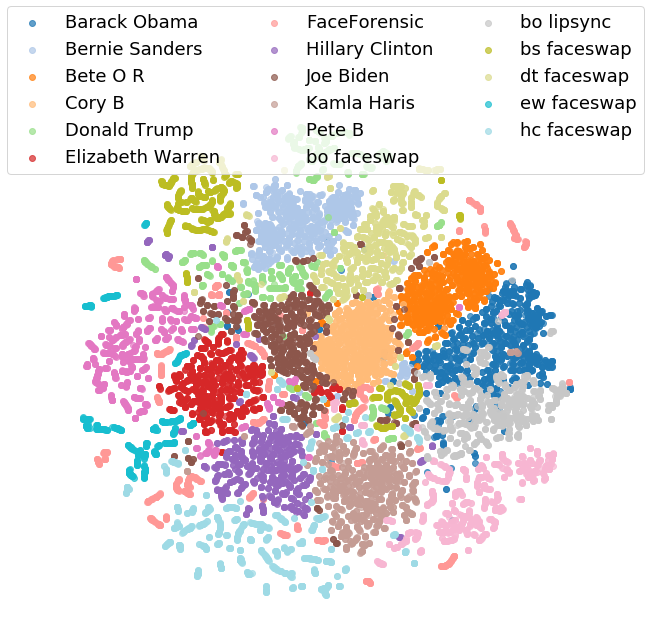

In [26]:
corr_fldr = 'only_cor'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

In [ ]:
corr_fldr = 'aus_metric'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

corr_fldr = 'fabnet_metric'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (16671, 256)


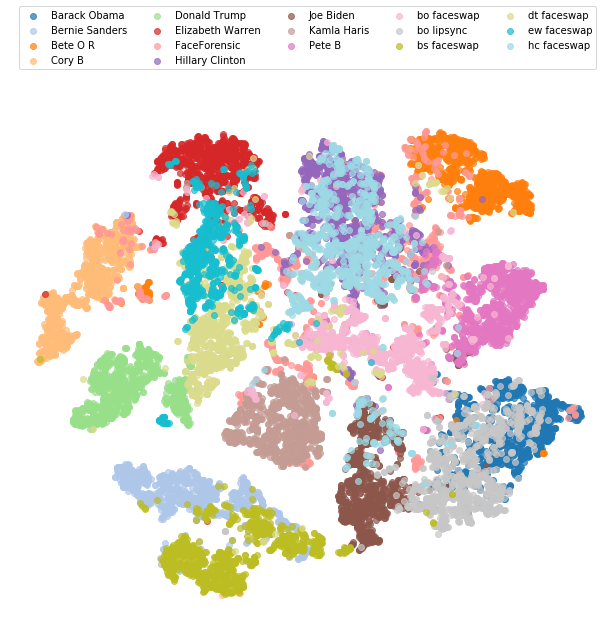

In [7]:
corr_fldr = 'aus_resnet18_sym'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (16671, 256)


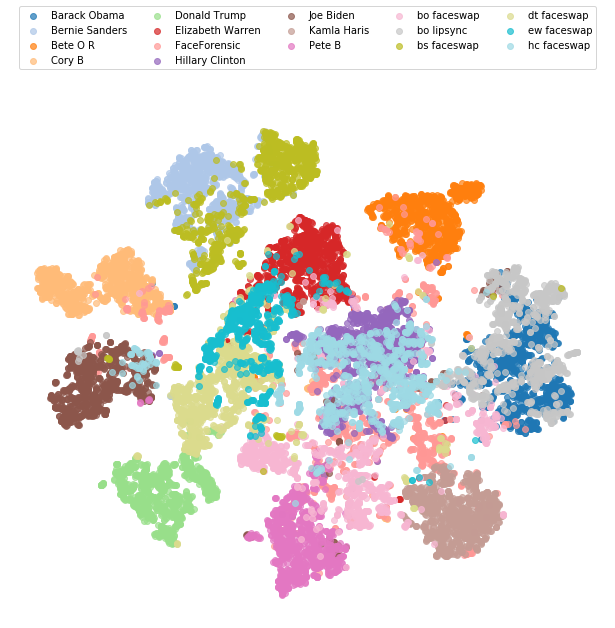

In [9]:
corr_fldr = 'directms_aus_resnet18_sym'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (16671, 256)


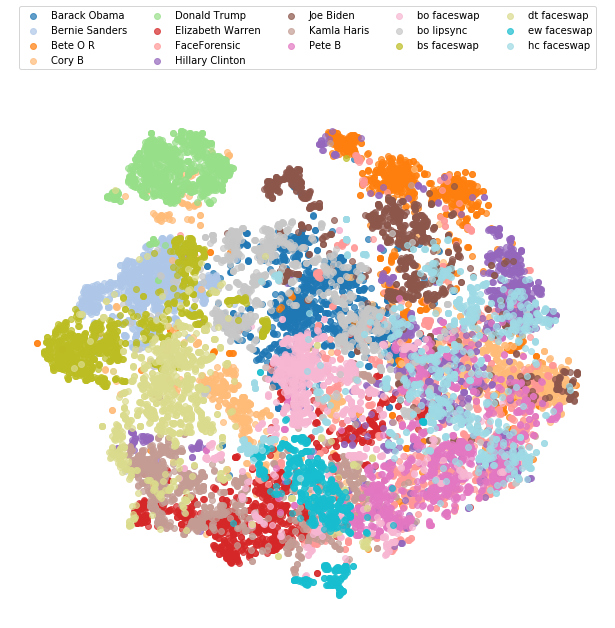

In [13]:
corr_fldr = 'ms_resnet18_aus_ldr_T100_norm'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (16572, 512)


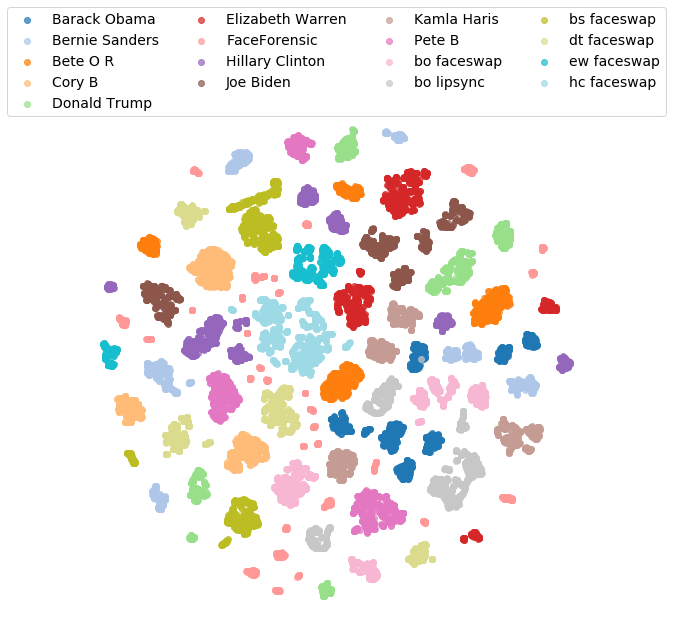

In [21]:
corr_fldr = 'ms_resnet50_fabnet_vox_test'
vid_len = 150 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (16671, 256)


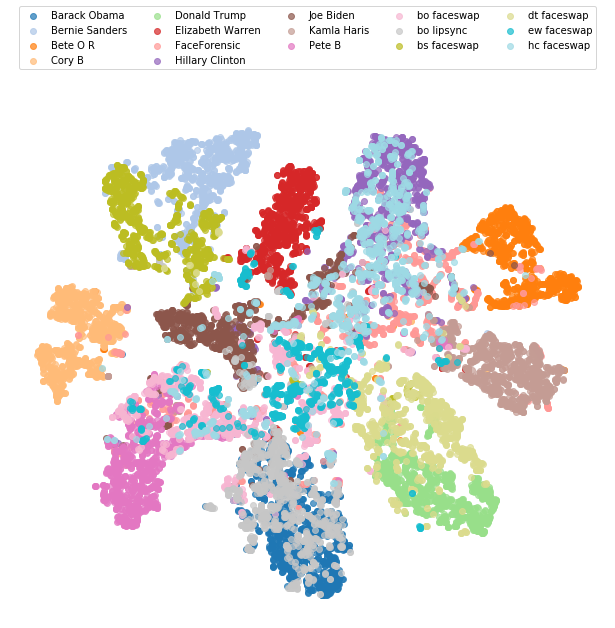

In [11]:
corr_fldr = 'ms_aus_asymalexnet_iter600'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (16460, 190)


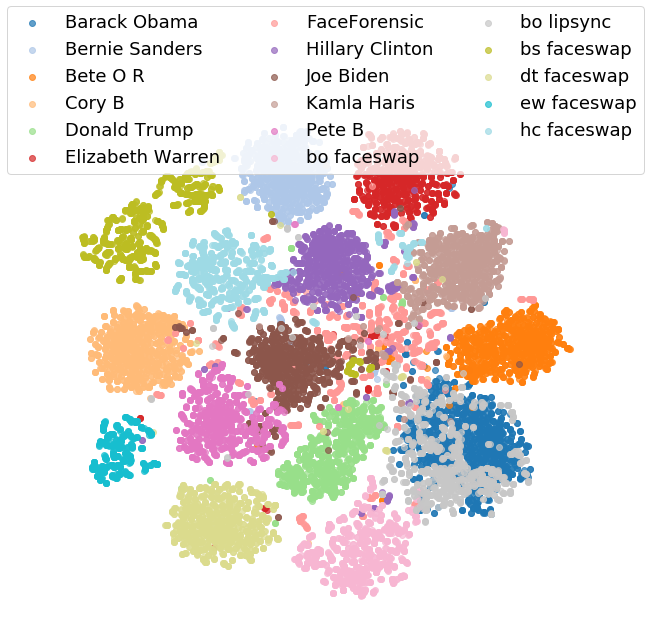

In [28]:
corr_fldr = 'directms_aus190_withFaceSwap'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (16672, 256)


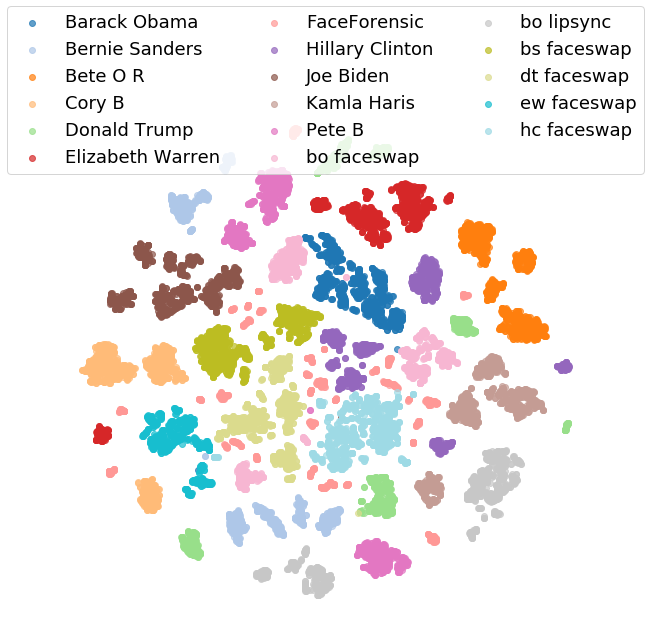

In [6]:
corr_fldr = 'ldrs_ms_resnet50_synFake'
vid_len = 100 #int(10*30) #30 fps
title = f'tsne_plots/{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (16460, 190)


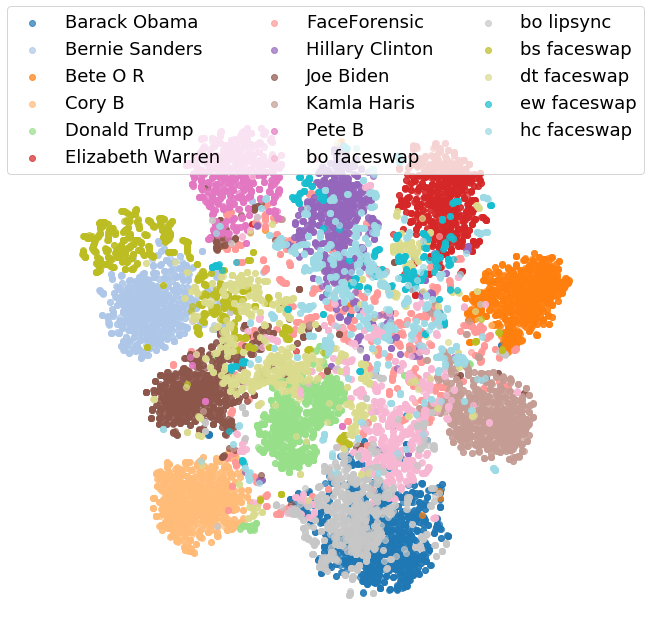

In [29]:
corr_fldr = 'directms_aus190_margin02'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (16460, 190)


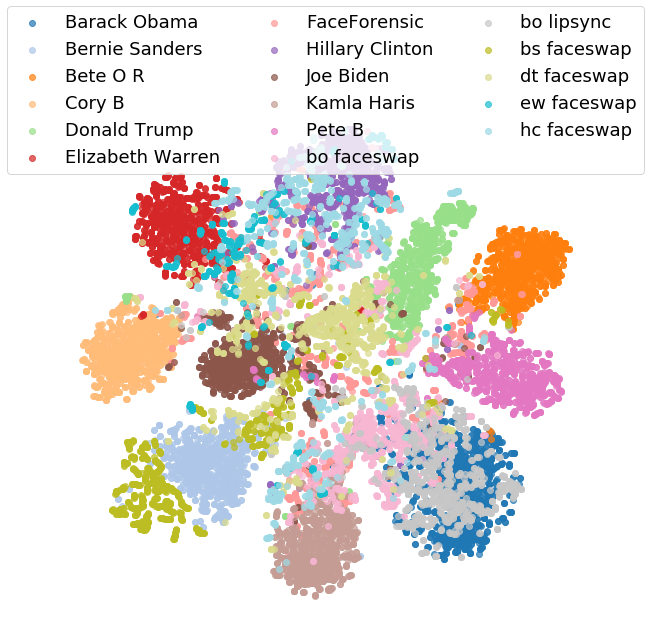

In [30]:
corr_fldr = 'directms_aus190_margin04'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (16460, 190)


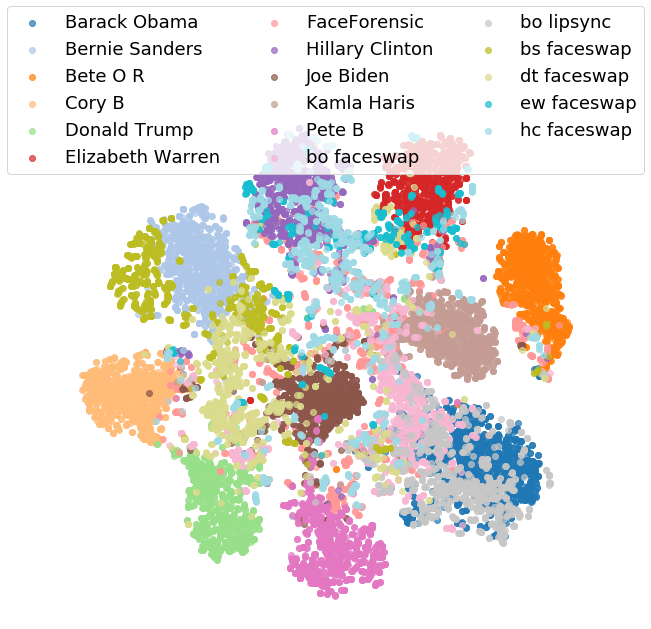

In [5]:
corr_fldr = 'directms_aus190_marg04_2'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (16460, 190)


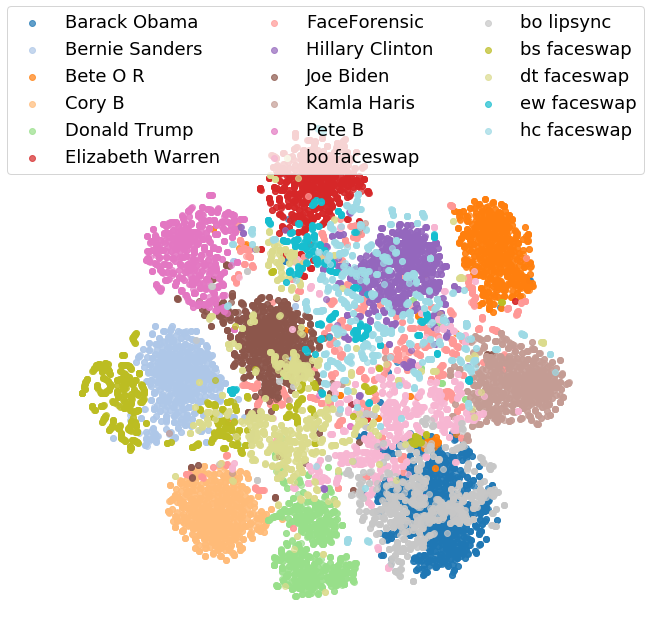

In [27]:
corr_fldr = 'directms_aus190'
vid_len = 100 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

tsne train (15895, 190)


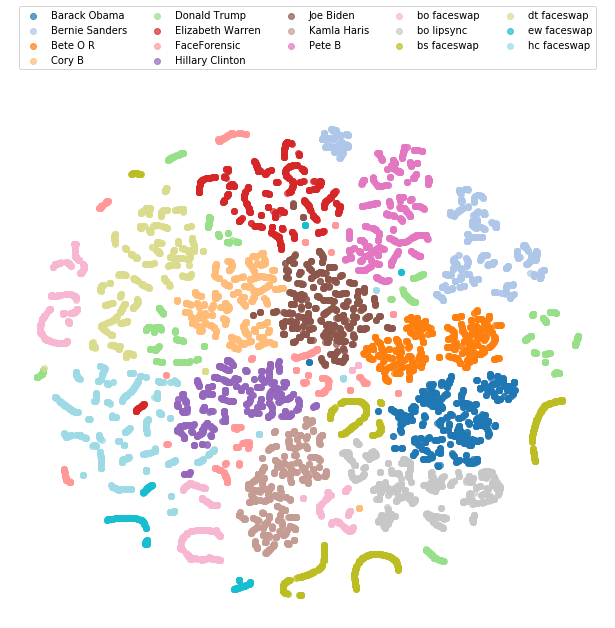

tsne train (16219, 256)


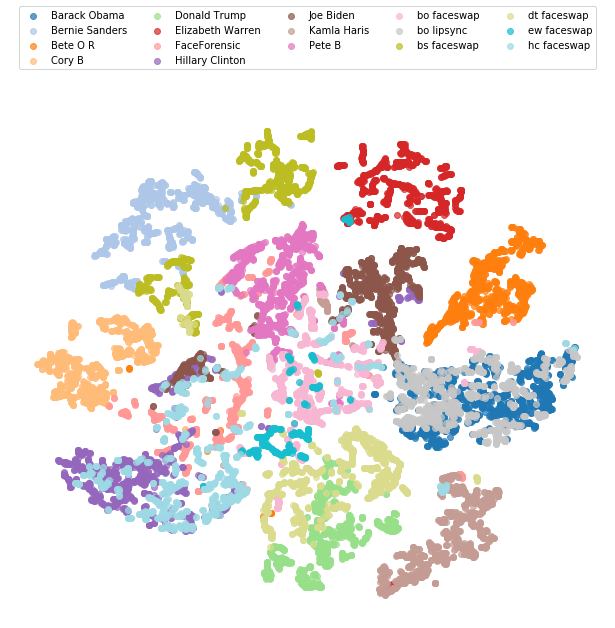

tsne train (16224, 256)


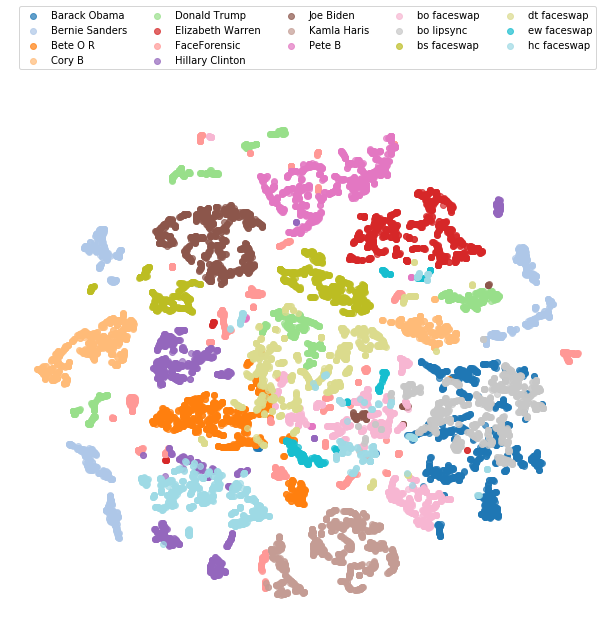

In [6]:
corr_fldr = 'only_cor'
vid_len = 300 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

corr_fldr = 'aus_metric'
vid_len = 300 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)

corr_fldr = 'fabnet_metric'
vid_len = 300 #int(10*30) #30 fps
title = f'{corr_fldr}_{vid_len}.png'
save_tsne_image(corr_fldr, vid_len, title)
